In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import math
import folium

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
crimedata = pd.read_csv('data/서울 cctv 범죄비율 상관관계/5대+범죄+발생현황_20240409150758.csv', encoding='utf-8')
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구별(1)  29 non-null     object
 1   자치구별(2)  29 non-null     object
 2   2022     29 non-null     object
 3   2022.1   29 non-null     object
 4   2022.2   29 non-null     object
 5   2022.3   29 non-null     object
 6   2022.4   29 non-null     object
 7   2022.5   29 non-null     object
 8   2022.6   29 non-null     object
 9   2022.7   29 non-null     object
 10  2022.8   29 non-null     object
 11  2022.9   29 non-null     object
 12  2022.10  29 non-null     object
 13  2022.11  29 non-null     object
dtypes: object(14)
memory usage: 3.3+ KB


In [4]:
crimedata.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,90399,65097,104,98,117,112,5816,5344,37579,20205,46783,39338
4,합계,종로구,3138,3284,2,3,8,8,228,988,1313,932,1587,1353


In [5]:
crimedata = crimedata[['자치구별(2)', '2022']]
crimedata.head(10)

,자치구별(2),2022
0,자치구별(2),합계
1,자치구별(2),소계
2,자치구별(2),발생
3,소계,90399
4,종로구,3138
5,중구,3071
6,용산구,2967
7,성동구,2194
8,광진구,3619
9,동대문구,3253


In [6]:
crimedata = crimedata.drop(labels=[0,1,2,3], axis=0)
crimedata.head()

,자치구별(2),2022
4,종로구,3138
5,중구,3071
6,용산구,2967
7,성동구,2194
8,광진구,3619


In [7]:
crimedata = crimedata.rename(columns = {'2022':'전체 범죄 발생 건수'})
crimedata = crimedata.rename(columns={'자치구별(2)':'자치구'})
crimedata.head()

,자치구,전체 범죄 발생 건수
4,종로구,3138
5,중구,3071
6,용산구,2967
7,성동구,2194
8,광진구,3619


In [8]:
crimedata['전체 범죄 발생 건수'] = [x.replace(',', '') for x in crimedata['전체 범죄 발생 건수']]
crimedata['전체범죄발생건수'] = pd.to_numeric(crimedata['전체 범죄 발생 건수'])
crimedata = crimedata.drop(columns='전체 범죄 발생 건수', axis=1)
crimedata.head()

,자치구,전체범죄발생건수
4,종로구,3138
5,중구,3071
6,용산구,2967
7,성동구,2194
8,광진구,3619


In [9]:
cctvdata = pd.read_csv('data/서울 cctv 범죄비율 상관관계/서울시 자치구 (연도별) CCTV 설치현황_231231.csv', encoding='cp949')
cctvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   순번                 25 non-null     float64
 1   구분                 26 non-null     object 
 2   총 계                26 non-null     object 
 3   2015년 이전
설치된 CCTV  26 non-null     object 
 4   2015년              26 non-null     object 
 5   2016년              26 non-null     object 
 6   2017년              26 non-null     object 
 7   2018년              26 non-null     object 
 8   2019년              26 non-null     object 
 9   2020년              26 non-null     object 
 10  2021년              26 non-null     object 
 11  2022년              26 non-null     object 
 12  2023년              26 non-null     object 
dtypes: float64(1), object(12)
memory usage: 2.8+ KB


In [10]:
cctvdata.head()

,순번,구분,총 계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,NaN,계,"99,515","8,759","5,725","8,537","10,770","10,619","12,855","11,525","9,358","9,379","11,988"
1,1.0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2,2.0,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3,3.0,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4,4.0,성동구,"4,409",190,352,278,939,457,640,483,366,233,471


In [11]:
cctvdata = cctvdata.drop(labels=0, axis=0)
cctvdata.head()

,순번,구분,총 계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,1.0,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2,2.0,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3,3.0,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4,4.0,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
5,5.0,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


In [12]:
cctvdata = cctvdata.drop(columns='순번', axis=1)
cctvdata.head()

,구분,총 계,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,"2,031",549,158,128,143,142,67,237,82,225,300
2,중 구,"2,718",275,236,239,372,386,155,364,419,137,135
3,용산구,"3,258",88,38,295,491,147,335,473,486,500,405
4,성동구,"4,409",190,352,278,939,457,640,483,366,233,471
5,광진구,"3,828",309,95,42,666,460,712,191,740,273,340


In [13]:
cctvdata = cctvdata[['구분', '총 계']]
cctvdata.iloc[1,0] = '중구'
cctvdata.head()

,구분,총 계
1,종로구,"2,031"
2,중구,"2,718"
3,용산구,"3,258"
4,성동구,"4,409"
5,광진구,"3,828"


In [14]:
cctvdata = cctvdata.rename(columns={'구분':'자치구'})
cctvdata = cctvdata.rename(columns={'총 계':'cctv(2023)'})
cctvdata.head()

,자치구,cctv(2023)
1,종로구,"2,031"
2,중구,"2,718"
3,용산구,"3,258"
4,성동구,"4,409"
5,광진구,"3,828"


In [15]:
cctvdata['cctv(2023)'] = [x.replace(',', '') for x in cctvdata['cctv(2023)']]
cctvdata['cctv대수(2023)'] = pd.to_numeric(cctvdata['cctv(2023)'])
cctvdata = cctvdata.drop(columns='cctv(2023)', axis=1)
cctvdata.head()

,자치구,cctv대수(2023)
1,종로구,2031
2,중구,2718
3,용산구,3258
4,성동구,4409
5,광진구,3828


In [16]:
areadata = pd.read_csv('data/서울 cctv 범죄비율 상관관계/시가화면적_20240409201138.csv')
areadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구별(1)       28 non-null     object
 1   자치구별(2)       28 non-null     object
 2   행정구역면적 (㎢)    28 non-null     object
 3   행정구역면적 (㎢).1  28 non-null     object
 4   행정구역면적 (㎢).2  28 non-null     object
 5   행정구역면적 (㎢).3  28 non-null     object
 6   시가화면적 현황      28 non-null     object
 7   시가화면적 현황.1    28 non-null     object
 8   시가화면적 현황.2    28 non-null     object
 9   시가화면적 현황.3    28 non-null     object
 10  시가화면적 현황.4    28 non-null     object
 11  시가화면적 현황.5    28 non-null     object
 12  시가화면적 현황.6    28 non-null     object
 13  시가화면적 현황.7    28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [17]:
areadata.head()

,자치구별(1),자치구별(2),행정구역면적 (㎢),행정구역면적 (㎢).1,행정구역면적 (㎢).2,행정구역면적 (㎢).3,시가화면적 현황,시가화면적 현황.1,시가화면적 현황.2,시가화면적 현황.3,시가화면적 현황.4,시가화면적 현황.5,시가화면적 현황.6,시가화면적 현황.7
0,자치구별(1),자치구별(2),소계,소계,소계,소계,시가화면적 (㎢),시가화면적 (㎢),시가화면적 (㎢),시가화면적 (㎢),시가화면적비율 (%),시가화면적비율 (%),시가화면적비율 (%),시가화면적비율 (%)
1,자치구별(1),자치구별(2),2016,2017,2018,2019,2016,2017,2018,2019,2016,2017,2018,2019
2,서울시,소계,605.20,605.24,605.24,605.24,371.20,371.20,371.50,371.54,61.34,61.33,61.38,61.39
3,서울시,종로구,23.91,23.91,23.91,23.91,12.77,12.77,12.77,12.77,53.39,53.39,53.39,53.39
4,서울시,중구,9.96,9.96,9.96,9.96,9.95,9.95,9.95,9.95,99.88,99.89,99.89,99.89


In [18]:
areadata = areadata[['자치구별(2)','시가화면적 현황.3']]
areadata.head()

,자치구별(2),시가화면적 현황.3
0,자치구별(2),시가화면적 (㎢)
1,자치구별(2),2019
2,소계,371.54
3,종로구,12.77
4,중구,9.95


In [19]:
areadata = areadata.rename(columns={'자치구별(2)':'자치구'})
areadata = areadata.rename(columns={'시가화면적 현황.3':'시가화면적'})
areadata = areadata.drop(labels=[0,1,2])
areadata.head()

,자치구,시가화면적
3,종로구,12.77
4,중구,9.95
5,용산구,13.37
6,성동구,12.47
7,광진구,11.80


In [27]:
areadata['시가화면적'] = [x.replace(',', '') for x in areadata['시가화면적']]
areadata['시가화 면적'] = pd.to_numeric(areadata['시가화면적'])
areadata = areadata.drop(columns='시가화면적', axis=1)
areadata.head()

,자치구,시가화 면적
3,종로구,12.77
4,중구,9.95
5,용산구,13.37
6,성동구,12.47
7,광진구,11.80


In [20]:
populationdata = pd.read_csv('data/서울 cctv 범죄비율 상관관계/주민등록인구(연령별_동별)_20240409204048.csv', encoding='utf-8')
populationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   동별(1)    27 non-null     object
 1   항목       27 non-null     object
 2   2023     27 non-null     object
 3   2023.1   27 non-null     object
 4   2023.2   27 non-null     object
 5   2023.3   27 non-null     object
 6   2023.4   27 non-null     object
 7   2023.5   27 non-null     object
 8   2023.6   27 non-null     object
 9   2023.7   27 non-null     object
 10  2023.8   27 non-null     object
 11  2023.9   27 non-null     object
 12  2023.10  27 non-null     object
 13  2023.11  27 non-null     object
 14  2023.12  27 non-null     object
 15  2023.13  27 non-null     object
 16  2023.14  27 non-null     object
 17  2023.15  27 non-null     object
 18  2023.16  27 non-null     object
 19  2023.17  27 non-null     object
 20  2023.18  27 non-null     object
 21  2023.19  27 non-null     object
 22  2023

In [21]:
populationdata.head()

,동별(1),항목,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,...,2023.12,2023.13,2023.14,2023.15,2023.16,2023.17,2023.18,2023.19,2023.20,2023.21
0,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,한국인,9386034,213014,300548,355014,378197,555058,800753,777975,...,701870,706835,609103,417048,321421,228831,110383,36809,8537,1448
2,종로구,한국인,139417,2342,3577,4540,5199,9113,12383,10882,...,11501,11332,9357,6218,5285,4328,2316,760,201,35
3,중구,한국인,121312,2687,2943,2898,3258,6727,10810,11558,...,9343,9763,8570,5766,4725,3669,1892,704,172,27
4,용산구,한국인,213151,5068,6021,6394,7226,11634,18469,20723,...,16114,16085,13241,8650,6972,5633,3272,1150,265,56


In [22]:
populationdata = populationdata[['동별(1)', '2023']]
populationdata = populationdata.drop(labels=[0,1])
populationdata.head()

,동별(1),2023
2,종로구,139417
3,중구,121312
4,용산구,213151
5,성동구,277361
6,광진구,335554


In [23]:
populationdata = populationdata.rename(columns={'동별(1)':'자치구'})
populationdata = populationdata.rename(columns={'2023':'계'})
populationdata.head()

,자치구,계
2,종로구,139417
3,중구,121312
4,용산구,213151
5,성동구,277361
6,광진구,335554


In [28]:
populationdata['계'] = [x.replace(',', '') for x in populationdata['계']]
populationdata['총인구수'] = pd.to_numeric(populationdata['계'])
populationdata = populationdata.drop(columns='계', axis=1)
populationdata.head()

,자치구,총인구수
2,종로구,139417
3,중구,121312
4,용산구,213151
5,성동구,277361
6,광진구,335554


In [29]:
finaldata = pd.merge(areadata, cctvdata)
finaldata = pd.merge(finaldata, crimedata)
finaldata = pd.merge(finaldata,populationdata)
finaldata.head(-1)

,자치구,시가화 면적,cctv대수(2023),전체범죄발생건수,총인구수
0,종로구,12.77,2031,3138,139417
1,중구,9.95,2718,3071,121312
2,용산구,13.37,3258,2967,213151
3,성동구,12.47,4409,2194,277361
4,광진구,11.80,3828,3619,335554
5,동대문구,13.86,3268,3253,341149
6,중랑구,11.18,4512,3599,382155
7,성북구,18.23,4578,2749,425602
8,강북구,11.25,3331,2832,288113
9,도봉구,9.84,2378,2141,306948


In [31]:
finaldata['범죄율'] = finaldata['전체범죄발생건수'] / finaldata['총인구수']
finaldata['면적당cctv대수'] = finaldata['cctv대수(2023)'] / finaldata['시가화 면적']
finaldata.head(-1)

,자치구,시가화 면적,cctv대수(2023),전체범죄발생건수,총인구수,범죄율,면적당cctv대수
0,종로구,12.77,2031,3138,139417,0.022508,159.044636
1,중구,9.95,2718,3071,121312,0.025315,273.165829
2,용산구,13.37,3258,2967,213151,0.013920,243.679880
3,성동구,12.47,4409,2194,277361,0.007910,353.568565
4,광진구,11.80,3828,3619,335554,0.010785,324.406780
5,동대문구,13.86,3268,3253,341149,0.009535,235.786436
6,중랑구,11.18,4512,3599,382155,0.009418,403.577818
7,성북구,18.23,4578,2749,425602,0.006459,251.124520
8,강북구,11.25,3331,2832,288113,0.009829,296.088889
9,도봉구,9.84,2378,2141,306948,0.006975,241.666667


In [33]:
finaldata = finaldata[['자치구', '범죄율', '면적당cctv대수']]
finaldata.head(-1)

,자치구,범죄율,면적당cctv대수
0,종로구,0.022508,159.044636
1,중구,0.025315,273.165829
2,용산구,0.013920,243.679880
3,성동구,0.007910,353.568565
4,광진구,0.010785,324.406780
5,동대문구,0.009535,235.786436
6,중랑구,0.009418,403.577818
7,성북구,0.006459,251.124520
8,강북구,0.009829,296.088889
9,도봉구,0.006975,241.666667


<function matplotlib.pyplot.show(close=None, block=None)>

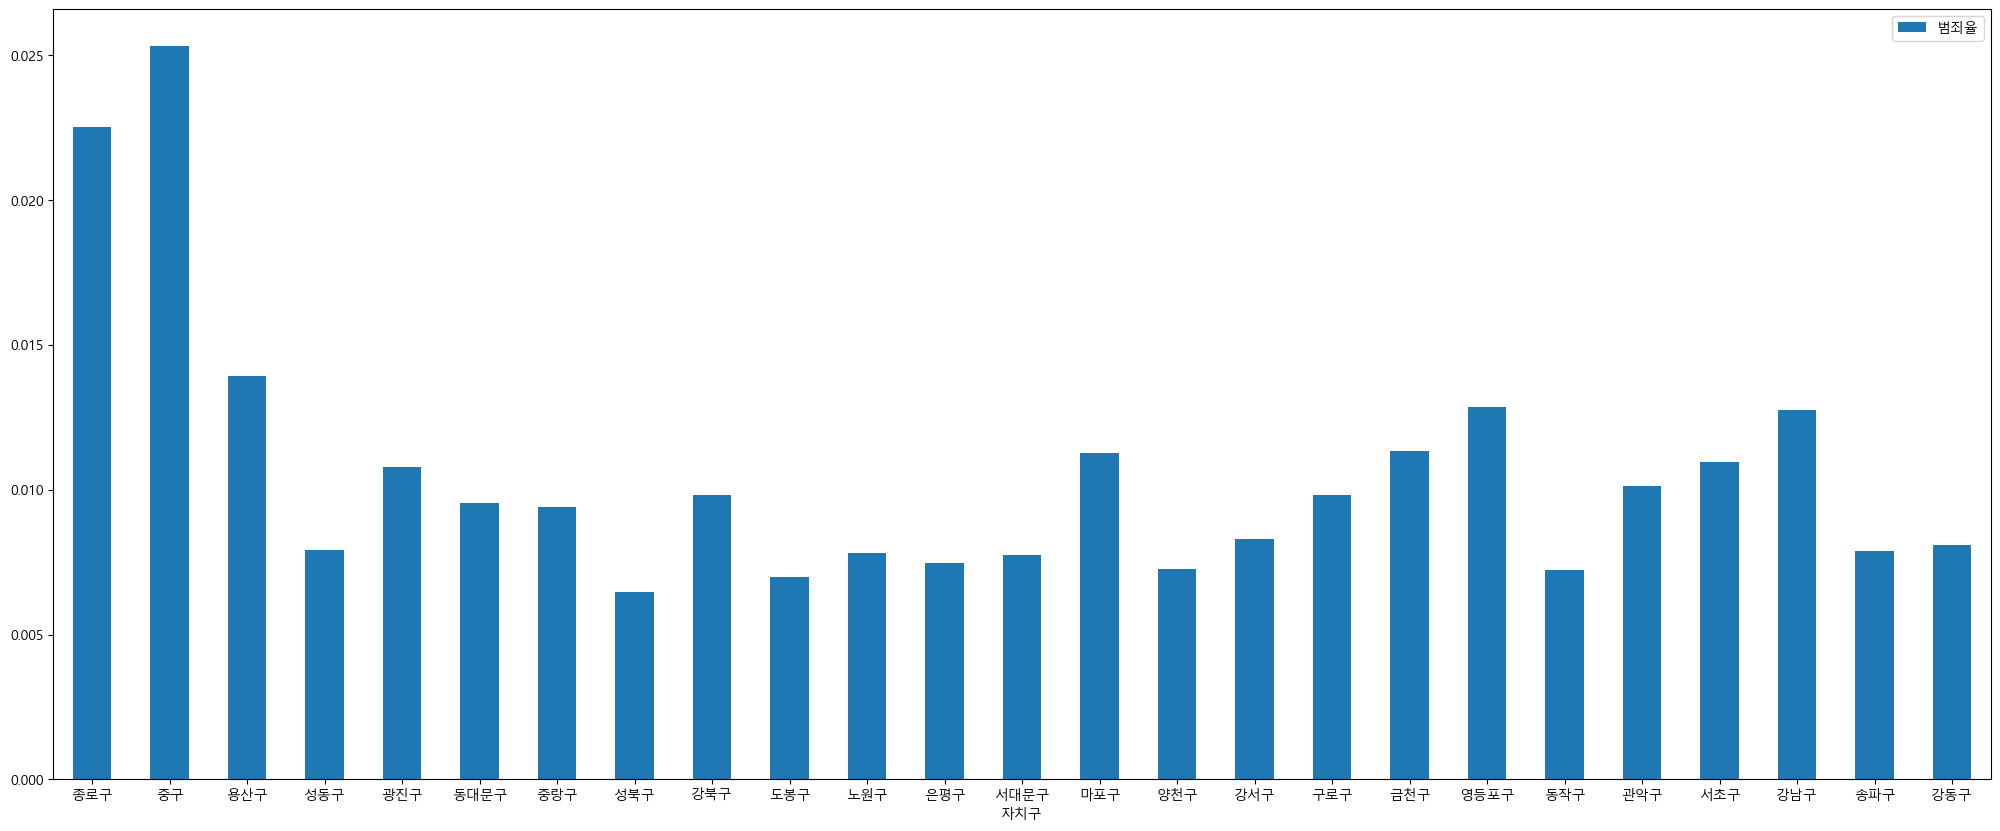

In [34]:
finaldata.plot.bar(x='자치구', y='범죄율', rot=0, figsize=(25,10))
plt.show()

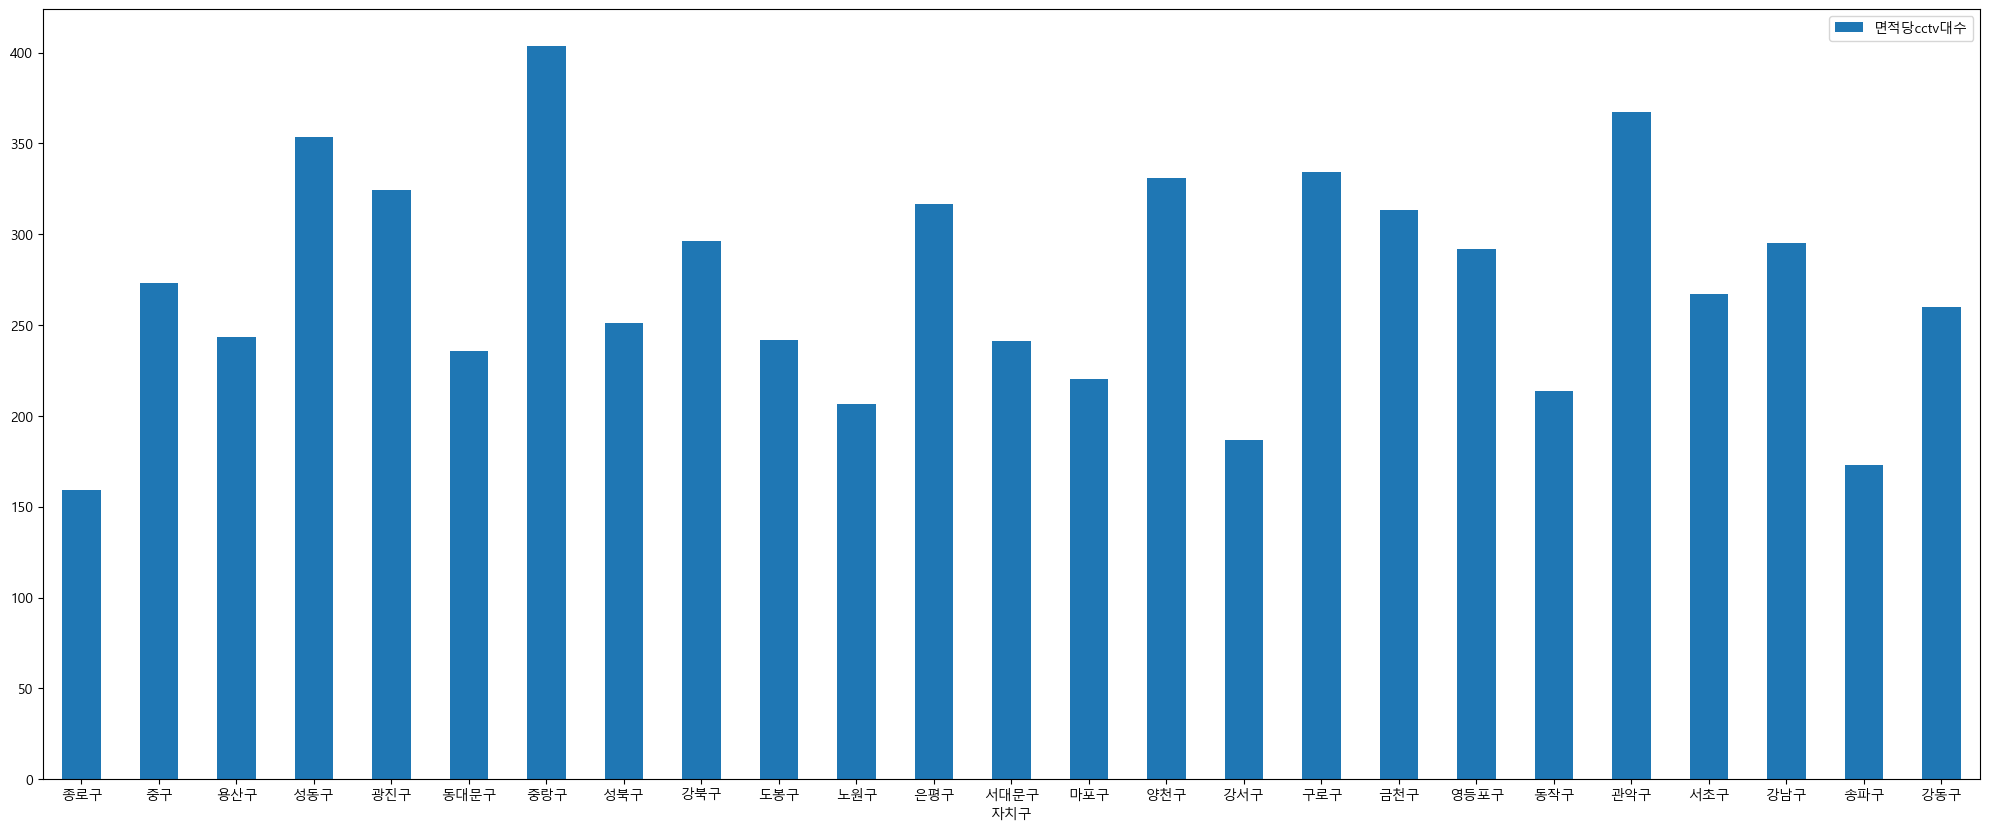

In [35]:
finaldata.plot.bar(x='자치구', y='면적당cctv대수', rot=0, figsize=(25,10))
plt.show()

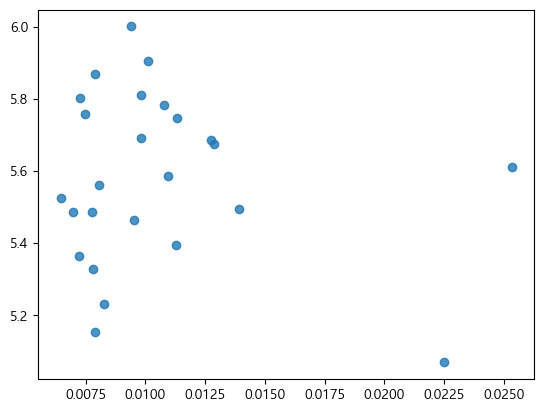

In [37]:
finaldata['log_cctv'] = finaldata['면적당cctv대수'].apply(math.log)
x = finaldata.log_cctv
y = finaldata.범죄율
plt.scatter(y,x,alpha=0.8)